In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sales_data = pd.read_csv('SalesData.csv')

In [ ]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3709 entries, 0 to 3708
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AccountId           3709 non-null   int64  
 1   AccountName         3709 non-null   object 
 2   Region              3709 non-null   object 
 3   Division            3709 non-null   object 
 4   City                3709 non-null   object 
 5   State               3709 non-null   object 
 6   Tier                3709 non-null   object 
 7   Month               3709 non-null   object 
 8   Sales2015           3709 non-null   float64
 9   Sales2016           3709 non-null   float64
 10  Units2015           3709 non-null   float64
 11  Units2016           3709 non-null   float64
 12  TargetAchevied2015  3709 non-null   float64
 13  TargetAchevied2016  3709 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 405.8+ KB


# 1. Compare Sales by region for 2016 with 2015 using bar chart

In [ ]:
reg_comp = sales_data.groupby('Region')[['Sales2015','Sales2016']].sum()

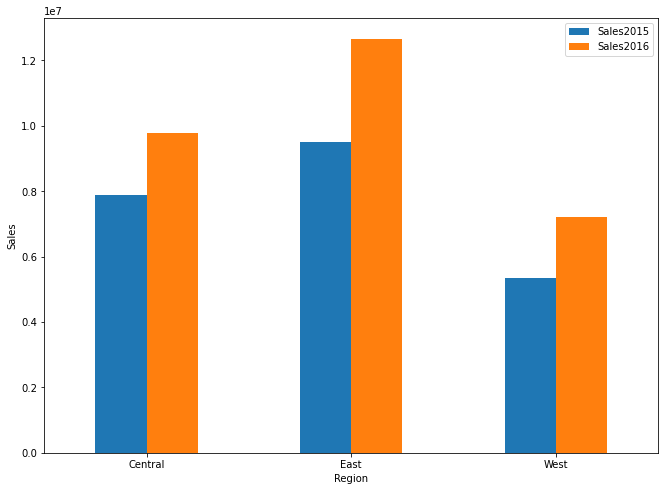

In [ ]:
reg_comp.plot(kind = 'bar', figsize = (11,8))
plt.xlabel('Region')
plt.ylabel('Sales')
plt.xticks(rotation = 0)
plt.show()

# 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

In [ ]:
reg = sales_data.groupby('Region')[['Sales2016']].sum()

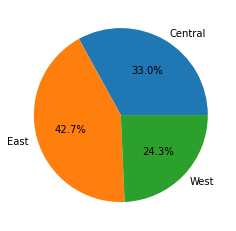

In [ ]:
reg.plot(kind = 'pie', subplots = True, legend = False, autopct = '%.1f%%')
plt.ylabel('')
plt.show()

# 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

In [ ]:
sales_summ = sales_data.groupby(['Region','Tier'])[['Sales2015','Sales2016']].sum()

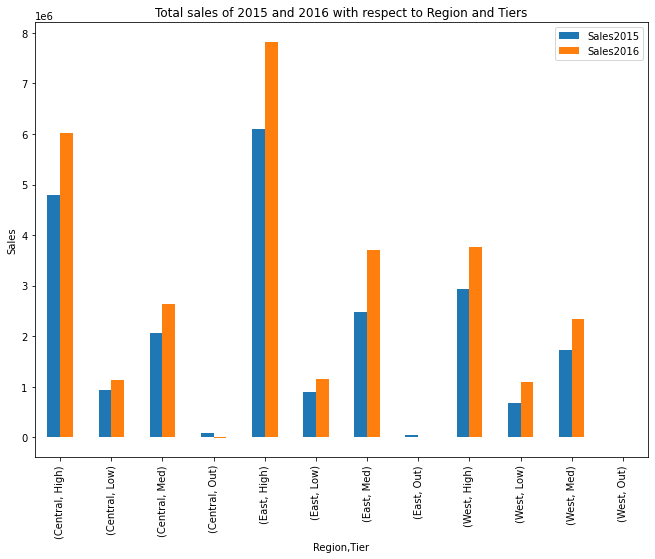

In [ ]:
sales_summ.plot(kind = 'bar', figsize = (11,8))
plt.ylabel("Sales")
plt.title("Total sales of 2015 and 2016 with respect to Region and Tiers")
plt.show()

# 4. In East region, which state registered a decline in 2016 as compared to 2015?

In [ ]:
sales_data.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


In [ ]:
dec_sale = sales_data.groupby([sales_data.Region[sales_data.Region == 'East'],'State'])[['Sales2015','Sales2016']].sum()
dec_sale_east  = dec_sale.loc['East']

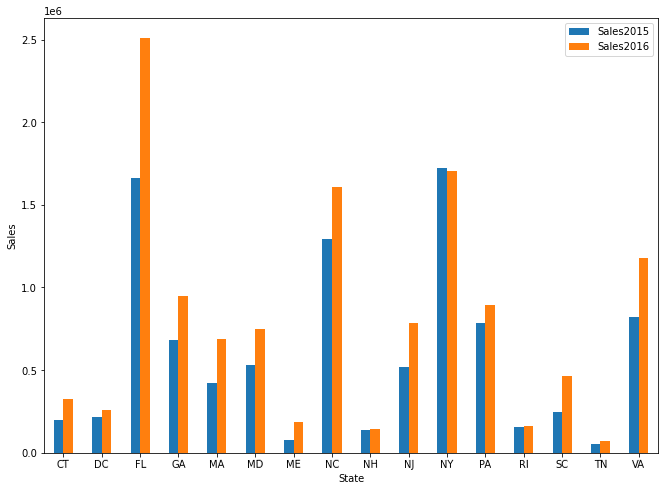

In [ ]:
dec_sale_east.plot(kind = 'bar',figsize = (11,8))
plt.ylabel('Sales')
plt.xticks(rotation = 1)
plt.show()

In [ ]:
print("NY state registered a decline in sales in 2016 as compared to 2015")

NY state registered a decline in sales in 2016 as compared to 2015


# 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

In [ ]:
dec_unit = sales_data.groupby(['Tier','Division'])[['Units2015','Units2016']].sum()
dec_unit_high = dec_unit.loc['High']

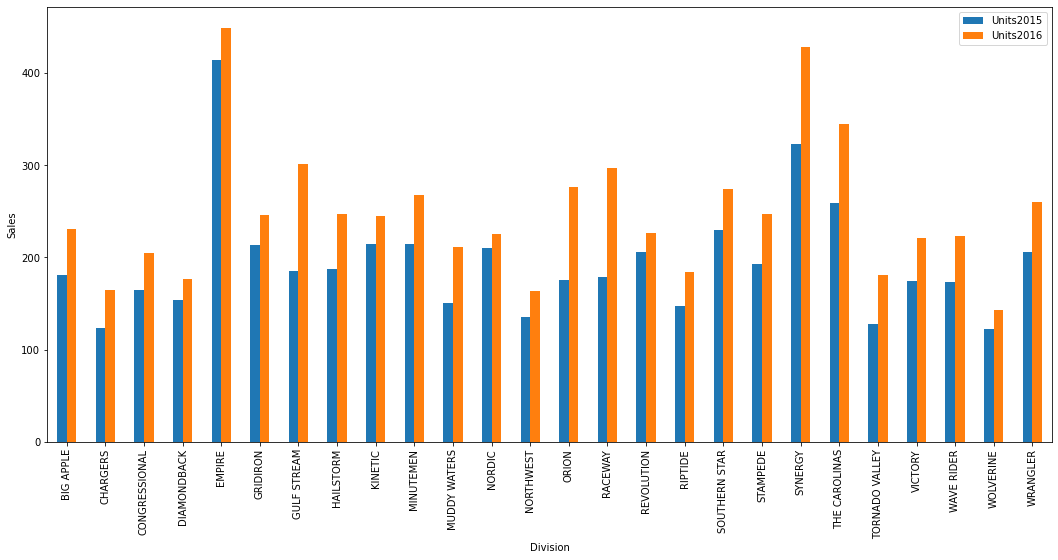

In [ ]:
dec_unit_high.plot(kind = 'bar',figsize = (18,8))
plt.ylabel('Sales')
plt.show()

In [ ]:
print("No division show decline in number of units sold in 2016 compared to 2015")

No division show decline in number of units sold in 2016 compared to 2015


# 6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. The Quarters are based on months and defined as -
• Jan - Mar : Q1
• Apr - Jun : Q2
• Jul - Sep : Q3
• Oct - Dec : Q4

In [ ]:
m = sales_data.Month

In [ ]:
mon = []
for x in m:
    if x in ["Jan","Feb","Mar"]:
        mon.append('Q1')
    elif x in ["Apr","May","Jun"]:
        mon.append('Q2')
    elif x in ["Jul","Aug","Sep"]:
        mon.append('Q3')
    else:
        mon.append('Q4')

In [ ]:
sales_data['Qtr'] = pd.Series(mon)

In [ ]:
sales_data.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,Q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,Q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53,Q3


# 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot

In [ ]:
qtr_sale = sales_data.groupby('Qtr')[['Sales2015','Sales2016']].sum()

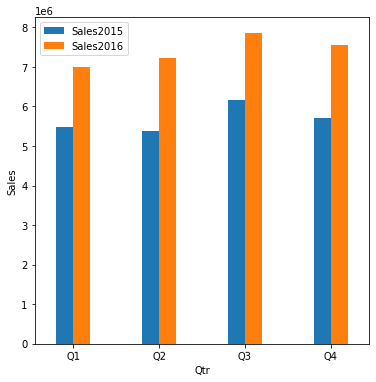

In [ ]:
qtr_sale.plot(kind = 'bar', figsize = (6,6), width = .4)
plt.ylabel('Sales')
plt.xticks(rotation = 1)
plt.show()

# 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.
(Draw 4 pie charts representing a Quarter for each Tier)

In [ ]:
qtr_tier_sales = sales_data.pivot_table(index= 'Tier', columns = 'Qtr', values = 'Sales2016', aggfunc= 'sum')
qtr_tier_sales.Q3 = abs(qtr_tier_sales.Q3)

array([<AxesSubplot:ylabel='Q1'>, <AxesSubplot:ylabel='Q2'>,
       <AxesSubplot:ylabel='Q3'>, <AxesSubplot:ylabel='Q4'>], dtype=object)

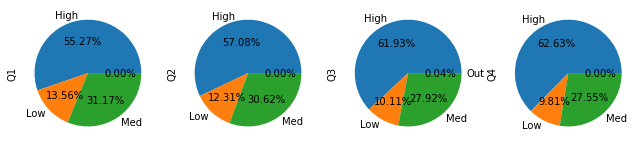

In [ ]:
qtr_tier_sales.plot(kind = 'pie', autopct='%.2f%%', subplots = True, legend = False, figsize = (11,8))